# EE460J Lab 1
## Programming Questions
**1.** Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.  
>(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point, and plot the histogram of the resulting 1000 points. What do you observe?  
>(b) Estimate the mean and the variance of the sum.

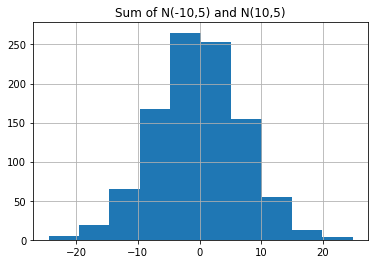

In [1]:
import numpy as np
import pandas as pd
import math
import random
from matplotlib import pyplot as plt 


# distribution 1
mean_1 = -10.0
std_dev_1 = 5.0
num_samples = 1000

# numpy formula for generating a Gaussian distribution ~ N(mean, std_dev)
# X = samples * std_dev + mean
dist_1 = np.random.randn(num_samples) * std_dev_1 + mean_1

# distribution 2
mean_2 = 10.0
std_dev_2 = 5.0
dist_2 = np.random.randn(num_samples) * std_dev_2 + mean_2

# add two distributions, point by point
dist_sum = []
for i in range(len(dist_1)):
    dist_sum.append(dist_1[i] + dist_2[i])
    
# plot summed distribution
plt.hist(dist_sum) 
plt.title("Sum of N(-10,5) and N(10,5)") 
plt.grid()
plt.show()

The new distribution appears to be centered around 0.



In [2]:
est_mean = sum(dist_sum)/num_samples
est_variance = sum([(v-est_mean)**2 for v in dist_sum])/num_samples
print(f'estimated mean: {est_mean}')
print(f'estimated variance: {est_variance}')

estimated mean: -0.1814602243297115
estimated variance: 49.711190709396995


**2.** Central Limit Theorem. Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable Zn = 1/√n * 􏰂Xi. By taking 1000 draws from Zn, plot its histogram. Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

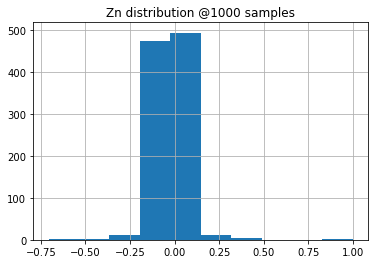

In [3]:
# sample Zn distribution 1000 times
num_samples = 1001
Zn_dist = [1/math.sqrt(i)*random.choice([-1,1]) for i in range(1,num_samples)]
# plot sampled distribution
plt.hist(Zn_dist) 
plt.title("Zn distribution @1000 samples") 
plt.grid()
plt.show()

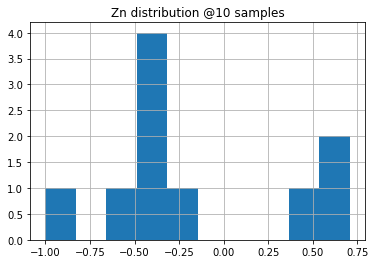

In [4]:
# sample Zn distribution 10 times
num_samples = 11
Zn_dist = [1/math.sqrt(i)*random.choice([-1,1]) for i in range(1,num_samples)]
# plot sampled distribution
plt.hist(Zn_dist) 
plt.title("Zn distribution @10 samples") 
plt.grid()
plt.show()

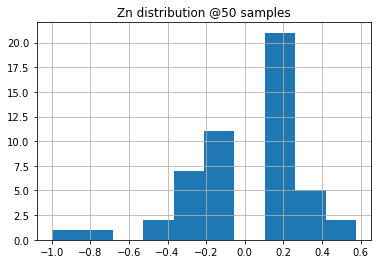

In [5]:
# sample Zn distribution 50 times
num_samples = 51
Zn_dist = [1/math.sqrt(i)*random.choice([-1,1]) for i in range(1,num_samples)]
# plot sampled distribution
plt.hist(Zn_dist) 
plt.title("Zn distribution @50 samples") 
plt.grid()
plt.show()

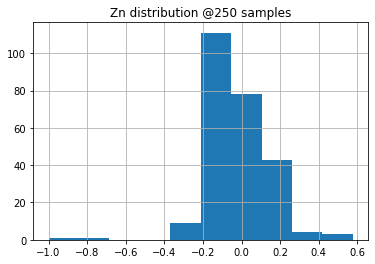

In [6]:
# sample Zn distribution 50 times
num_samples = 251
Zn_dist = [1/math.sqrt(i) * random.choice([-1,1]) for i in range(1,num_samples)]
# plot sampled distribution
plt.hist(Zn_dist) 
plt.title("Zn distribution @250 samples") 
plt.grid()
plt.show()

**3.** Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [7]:
mean = 0.0
std_dev = 5.0
num_samples = 25000

# numpy formula for generating a Gaussian distribution ~ N(mean, std_dev)
# X = samples * std_dev + mean
dist = np.random.randn(num_samples) * std_dev + mean

est_mean = sum(dist)/num_samples
est_std_dev = math.sqrt(sum([(v-est_mean)**2 for v in dist])/num_samples)
print(f'estimated mean: {est_mean}')
print(f'estimated standard deviation: {est_std_dev}')

estimated mean: 0.029738452066548484
estimated standard deviation: 4.985761883001775


**4.** Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution  
> (Xi) = N([-5],[20 0.8])  
> (Yi) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;([ 5] [0.8 30]) 

Then, estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [8]:
# given distribution values
mean = [-5, 5]
cov = [[20, 0.8], [0.8, 30]] # diagonal covariance
num_samples = 10000
# sample given distribution
x, y = np.random.multivariate_normal(mean, cov, num_samples).T

# find x and y sample means/variances and covariance
x_mean = sum(x)/num_samples
x_var = sum([(v-x_mean)**2 for v in x])/num_samples
y_mean = sum(y)/num_samples
y_var = sum([(v-y_mean)**2 for v in y])/num_samples
cov_xy = 1/(num_samples-1) * sum([(x[i]-x_mean)*(y[i]-y_mean) for i in range(num_samples)])

print('Mean matrix')
print([x_mean, y_mean])
print('Covariance matrix')
print([[x_var, cov_xy],[cov_xy, y_var]])

Mean matrix
[-4.949139469493315, 4.914722682259831]
Covariance matrix
[[20.33933864549053, 1.1610811471308022], [1.1610811471308022, 30.138767634197883]]


**5.** Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset.  
For example:  
>(a) How many patients and how many features are there?  
>(b) What is the meaning of the first 4 features? See if you can understand what they mean.  
>(c) Are there missing values? Replace them with the average of the corresponding feature column  
>(d) How could you test which features strongly influence the patient condition and which do not?  

List what you think are the three most important features.

In [9]:
df = pd.read_csv('PatientData.csv', header=None, na_values=['?'])
print(f'Num Patients: {len(df)}')
print(f'Num Features: {len(df.columns)-1}') # need to subtract 1 to account for the result column

Num Patients: 452
Num Features: 279


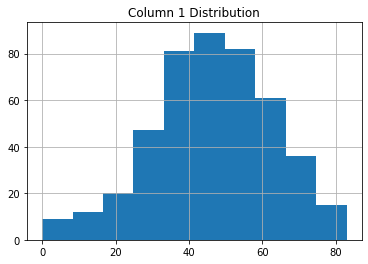

Mean: 46.4712389380531
Standard Deviation: 16.448405933617636
Feature 1 looks like age, a numerical data


In [10]:
# plot column 1
plt.hist(df[0]) 
plt.title("Column 1 Distribution") 
plt.grid()
plt.show()

est_mean = sum(df[0])/len(df[0])
est_std_dev = math.sqrt(sum([(v-est_mean)**2 for v in df[0]])/len(df[0]))
print(f'Mean: {est_mean}')
print(f'Standard Deviation: {est_std_dev}')
print('Feature 1 looks like age, a numerical data')

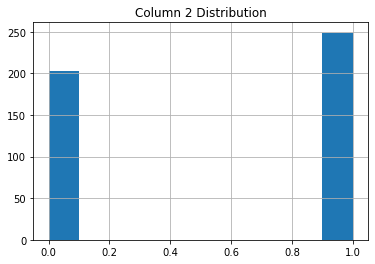

Mean: 0.5508849557522124
Standard Deviation: 0.49740398196847574
Feature 2 looks like gender, a categorical data (also boolean here)


In [11]:
# plot column 2
plt.hist(df[1]) 
plt.title("Column 2 Distribution") 
plt.grid()
plt.show()

est_mean = sum(df[1])/len(df[1])
est_std_dev = math.sqrt(sum([(v-est_mean)**2 for v in df[1]])/len(df[1]))
print(f'Mean: {est_mean}')
print(f'Standard Deviation: {est_std_dev}')
print('Feature 2 looks like gender, a categorical data (also boolean here)')

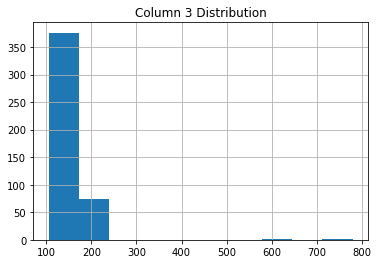

Mean: 166.18805309734512
Standard Deviation: 37.129199666717625
Feature 3 looks like height by centimeters, a numerical data.


In [12]:
# plot column 3
plt.hist(df[2]) 
plt.title("Column 3 Distribution") 
plt.grid()
plt.show()

est_mean = sum(df[2])/len(df[2])
est_std_dev = math.sqrt(sum([(v-est_mean)**2 for v in df[2]])/len(df[2]))
print(f'Mean: {est_mean}')
print(f'Standard Deviation: {est_std_dev}')
print('Feature 3 looks like height by centimeters, a numerical data.')

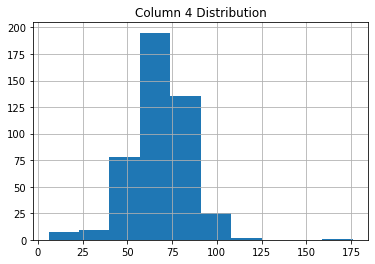

Mean: 68.17035398230088
Standard Deviation: 16.572439720263766
Feature 4 looks like weight by kilograms, a numerical data


In [13]:
# plot column 4
plt.hist(df[3]) 
plt.title("Column 4 Distribution") 
plt.grid()
plt.show()

est_mean = sum(df[3])/len(df[3])
est_std_dev = math.sqrt(sum([(v-est_mean)**2 for v in df[3]])/len(df[3]))
print(f'Mean: {est_mean}')
print(f'Standard Deviation: {est_std_dev}')
print('Feature 4 looks like weight by kilograms, a numerical data')

In [14]:
# find means and replace all empty data with their respective column's mean
df_means = df.mean()
for col in range(len(df.columns)):
    df[col].fillna(df_means[col], inplace=True)
print('Example of mostly empty data column (Col 13)')
print(f'Col 13 Mean: {df_means[13]}')
print(f'Col 13 Data:\n{df[13]}')

Example of mostly empty data column (Col 13)
Col 13 Mean: -13.592105263157896
Col 13 Data:
0      -13.592105
1      -13.592105
2       23.000000
3      -13.592105
4      -13.592105
          ...    
447    -13.592105
448    -13.592105
449     84.000000
450    103.000000
451    -13.592105
Name: 13, Length: 452, dtype: float64


I think we can test which features strongly influence the patient condition or not, by finding the correlation coefficient between each feature column on the final result column. Although correlation does not prove causation, it can provide insight on which features potentially have a strong influence on the final outcome/patient condition. I will find the correlation coefficient for each column to result column below, and use the results to help me decide.

In [15]:
correlations = []
for i in range(len(df.columns)-1):
    correlations.append(df[i].corr(df.iloc[:,-1]))
# use abs value to standardize sorting, set corr coefficint as 0 if NaN
abs_correlations = [0 if np.isnan(c) else abs(c) for c in correlations]

top_3_corr_idx = np.argsort(abs_correlations)[-3:] # the top 3 correlation coefficients are listed low to high

print('I would pick... (starting point Column 1/not 0-indexed)\n')
# plus 1 to offset 0-indexing
print(f'1st Column: {top_3_corr_idx[2]} w/ correlation {correlations[top_3_corr_idx[2]]}') 
print(f'2nd Column: {top_3_corr_idx[1]} w/ correlation {correlations[top_3_corr_idx[1]]}')
print(f'3rd Column: {top_3_corr_idx[0]} w/ correlation {correlations[top_3_corr_idx[0]]}')

I would pick... (starting point Column 1/not 0-indexed)

1st Column: 91 w/ correlation 0.3688756038874989
2nd Column: 5 w/ correlation 0.32387872830084175
3rd Column: 93 w/ correlation 0.31398249937854567


These three columns had the highest correlation coefficients out of all the features, so I would be more
confident choosing these 3 as the most important features in this dataset.